Initial Matrix:


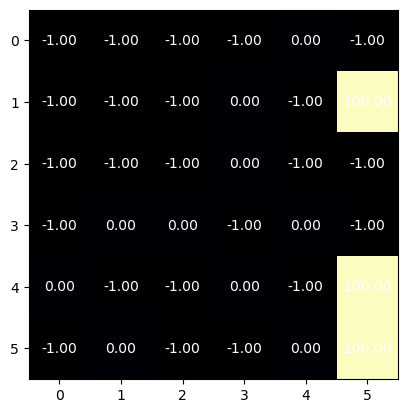



Final Convergence Value Matrix:


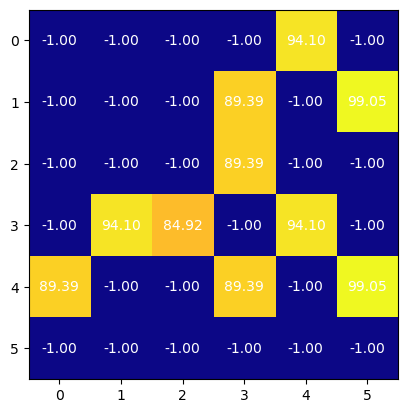



Best Path: [0, 4, 5]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

NUM_ROOMS = 6
GOAL_STATE = 5
NUM_EPISODES = 1000
LEARNING_RATE = 0.8
DISCOUNT_FACTOR = 0.95

paths = {
    0: [4],
    1: [3, 5],
    2: [3],
    3: [1, 2, 4],
    4: [0, 3, 5],
    5: [1, 4, 5]
}

def initialize_q_matrix():
    return np.full((NUM_ROOMS, NUM_ROOMS), -1, dtype=float)

def update_q_matrix(q_matrix, state, action, reward, next_state):
    max_q_next = np.max(q_matrix[next_state, :])
    q_matrix[state, action] = (1 - LEARNING_RATE) * q_matrix[state, action] + \
                              LEARNING_RATE * (reward + DISCOUNT_FACTOR * max_q_next)

def q_learning():
    q_matrix = initialize_q_matrix()

    for episode in range(NUM_EPISODES):
        for state in range(NUM_ROOMS - 1):
            for action in paths[state]:
                next_state = action if action != GOAL_STATE else GOAL_STATE
                reward = 100 if next_state == GOAL_STATE else 0

                update_q_matrix(q_matrix, state, action, reward, next_state) #part of the for loop

    return q_matrix

def print_matrix(matrix, cmap, vmin=None, vmax=None):
    labels = ['0', '1', '2', '3', '4', '5']
    fig, ax = plt.subplots()
    if vmin is not None and vmax is not None:
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = None
    im = ax.imshow(matrix, cmap=cmap, norm=norm)
    #Displaying labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    #Displaying values
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='w')
    plt.show()

def print_best_path(q_matrix):
    current_state = 0
    path = [current_state]
    while current_state != GOAL_STATE:
        action = np.argmax(q_matrix[current_state, :])
        path.append(action)
        current_state = action
    print("Best Path:", path)

if __name__ == "__main__":
    final_q_matrix = q_learning()

    print("Initial Matrix:")
    initial_matrix = np.full((NUM_ROOMS, NUM_ROOMS), -1, dtype=int)
    for i, row in enumerate(initial_matrix):
        for j in paths[i]:
            if j == GOAL_STATE:
                initial_matrix[i, j] = 100
            else:
                initial_matrix[i, j] = 0
    print_matrix(initial_matrix, cmap='magma', vmin=-1, vmax=100)
    print("\n")

    print("Final Convergence Value Matrix:")
    print_matrix(final_q_matrix, cmap='plasma', vmin=-1, vmax=np.max(final_q_matrix))
    print("\n")

    print_best_path(final_q_matrix)

In a broader sense, the successful determination of the optimal path after 1000 episodes through Q-learning exemplifies the power of reinforcement learning algorithms in autonomously acquiring and refining strategies over time. This iterative learning process showcases the adaptability and efficiency of Q-learning in solving complex decision-making problems within diverse environments. The best possible path is hence: 0 -> 4 -> 5.